#Acid Rain forecasting using Statistical Methods

*Acid rain has been a hazardous issue since a the start of industrial revolution in UK back in 1980. Ever since then many measures have been taken by the britsh government to over come this issue. Thus, forecasting the future trends is an essential step in bringing awarness among people and the government and encourage them to take necessary steps to overcome the problem. This project builds a time series based forecasting model to predict the acid rain emission trend over past 29 years.* 

*As a first step, all the necessary libraries are imported which would be used in the project for analysis.*

In [1]:
# import packages needed for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import VECM
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import grangercausalitytests
import plotly
import statsmodels.api as sm
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
%matplotlib inline
sm.tsa.statespace.SARIMAX
import warnings
warnings.filterwarnings('ignore')

#Uni-variate Time series analysis

Three time series datasets are required for the analysis in this project. The following steps are executed to Load, clean and understand the datset. The acid rain dataset is loaded first, and any empty values in the dataset are checked.

In [2]:
df = pd.read_csv('acidrain .csv')
df.head(5)

,Year,Agriculture,Mining,Manufacturing,Electricity,sewage,Construction,vehicles,Transport,Accommodation,Information and communication,Real estate activities,technical activities,Administrative activities,Total
0,1990,677.9,165.3,940.1,"3,035.60",36.0,84.1,78.2,901.3,7.7,6.4,2.7,11.7,17.5,6853
1,1991,674.2,158.4,955.4,"2,898.20",46.0,82.1,77.3,949.3,8.0,6.4,2.7,11.6,17.5,6779
2,1992,648.6,153.0,995.7,"2,746.70",46.9,81.3,75.3,900.2,7.8,6.3,2.7,11.4,17.3,6564
3,1993,635.3,170.2,959.6,"2,395.90",41.9,81.1,73.1,870.2,8.1,6.2,2.6,11.2,17.2,6118
4,1994,642.1,175.5,872.5,"2,216.70",37.4,82.9,72.4,858.4,7.6,6.1,2.6,11.0,17.1,5792


In [3]:
df.tail(5)

,Year,Agriculture,Mining,Manufacturing,Electricity,sewage,Construction,vehicles,Transport,Accommodation,Information and communication,Real estate activities,technical activities,Administrative activities,Total
26,2016,518.4,83.6,199.0,121.8,17.8,41.7,27.1,466.8,3.8,1.5,1.3,2.6,8.6,1726
27,2017,519.4,83.2,202.1,101.3,18.3,43.3,25.2,299.4,3.8,1.4,1.2,2.5,8.5,1543
28,2018,515.4,79.7,195.2,84,18.2,42.6,23.7,395.6,3.8,1.3,1.2,2.4,8.3,1608
29,2019,508.9,80.1,184.8,68,17.9,40.5,22.7,282.4,3.8,1.3,1.2,2.3,8.2,1461
30,2020,482.8,58.9,168.9,62.7,17.5,37.9,20.6,215.6,3.6,1.1,1.1,2.1,7.5,1292


In [4]:
df.shape

(31, 15)

In [5]:
df[['Year','Total']].isna().sum()
type(df.Year.iloc[0])

numpy.int64

In [6]:
type(df.Total.iloc[0])

numpy.int64

**Coal Production dataset**

The dataset is loaded into the pandas dataframe to perform the analysis.

In [7]:
df_coal = pd.read_csv('coal production .csv')

In [8]:
df_coal.tail(5)

,year,output
26,2016,4
27,2017,3
28,2018,3
29,2019,3
30,2020,2


In [9]:
df_coal.shape

(31, 2)

In [10]:
df_coal.dtypes

year      int64
output    int64
dtype: object

**SO2 concentration dataset**

In [11]:
df_so2 = pd.read_csv('so2data.csv')
df_so2.head(4)

,Year,Agriculture,Mining,Manufacturing,Water supply,Construction,Wholesale and retail,Transport,food services,Totalso2
0,1990,20.9,61.1,639.2,12.8,8.6,7.9,374.4,1.4,1126.3
1,1991,20.8,56.3,657.3,20.3,8.2,7.5,388.4,1.4,1160.2
2,1992,21.1,52.7,706.0,21.2,8.3,7.7,355.4,1.4,1173.8
3,1993,21.9,59.3,681.7,17.2,8.3,7.5,338.7,1.7,1136.3


In [12]:
df_so2[['Year']].isna().sum()

Year    0
dtype: int64

# Visualization

All the three datsets are visualised, for gaining initial insights into the trends.

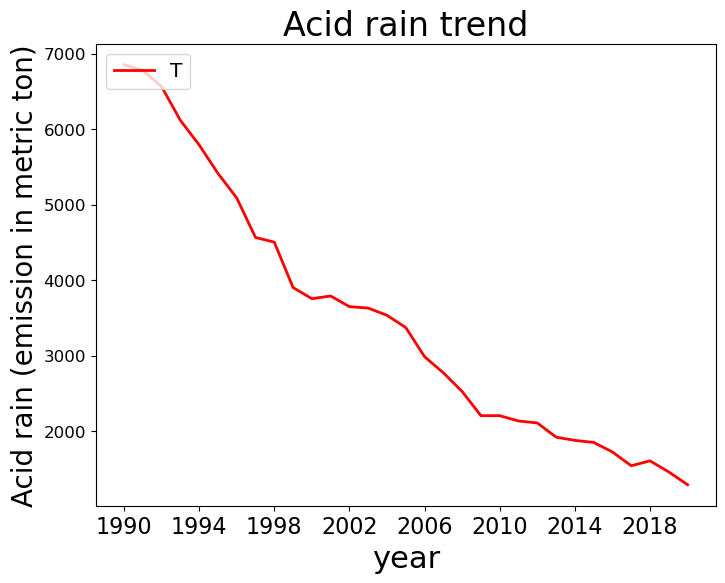

In [13]:
plt.figure(figsize=(8,6));
plt.plot(df.Year, df.Total, linewidth=2, color='Red');
plt.xticks(np.arange(1990,2020,4),fontsize=16);
plt.yticks(fontsize=12);
plt.xlabel('year',fontsize=22)
plt.ylabel('Acid rain (emission in metric ton)', fontsize=20)
plt.title('Acid rain trend', fontsize=24)
plt.legend(('Total acid rain (metric ton)'), loc='upper left', fontsize='x-large');

The acid rain plot shows a consistent downward trend.

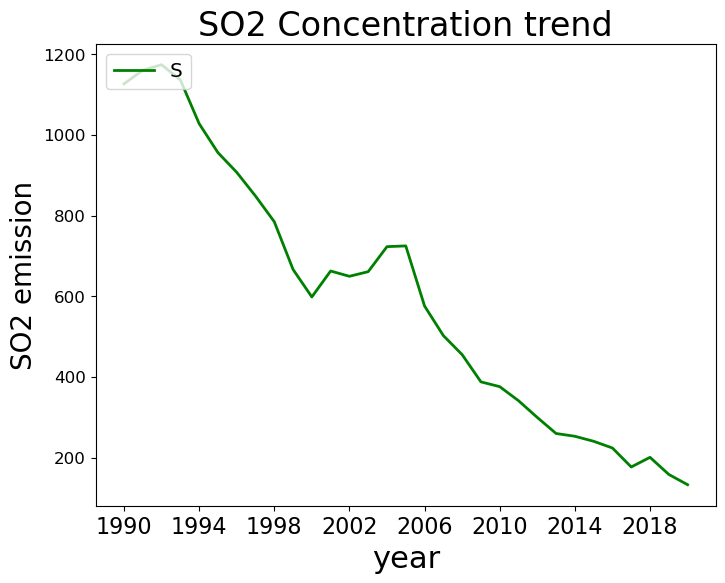

In [14]:
plt.figure(figsize=(8,6));
plt.plot(df_so2.Year, df_so2.Totalso2, linewidth=2, color='Green');
plt.xticks(np.arange(1990,2020,4),fontsize=16);
plt.yticks(fontsize=12);
plt.xlabel('year',fontsize=22)
plt.ylabel('SO2 emission', fontsize=20)
plt.title('SO2 Concentration trend', fontsize=24)
plt.legend(('SO2'), loc='upper left', fontsize='x-large');

The above plot depicts the SO2 emission trend since 1990. The plot shows a strict downward trend until 1998, followed a short term rise and then again dropping down consistently since 2006.

**Plotting both the Time series on a single graph**

In [15]:
df1= df[['Year', 'Total']].copy()
df2= df_so2[['Year', 'Totalso2']].copy()

In [16]:
df_combine = pd.merge(df1, df2, on='Year')
df_combine.head(3)

,Year,Total,Totalso2
0,1990,6853,1126.3
1,1991,6779,1160.2
2,1992,6564,1173.8


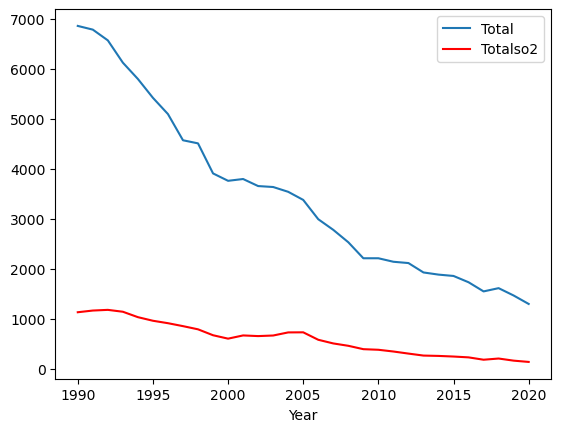

In [17]:
# gca stands for 'get current axis'
ax = plt.gca()

df_combine.plot(kind='line',x='Year',y='Total',ax=ax)
df_combine.plot(kind='line',x='Year',y='Totalso2', color='red', ax=ax)

plt.show()

Both the time series decline with time, as can be seen in the above figure, with acid rain pollution levels being quite high in 1990 and SO2 emissions being considerable higher than following years. This demonstrates that, in addition to so2, other pollutants contribute to higher acid rain pollution levels.

*Visualizing Coal production since 1990*

In [18]:
df_coal.head()

,year,output
0,1990,93
1,1991,94
2,1992,84
3,1993,68
4,1994,50


In [19]:
df_coal.columns

Index(['year', 'output'], dtype='object')

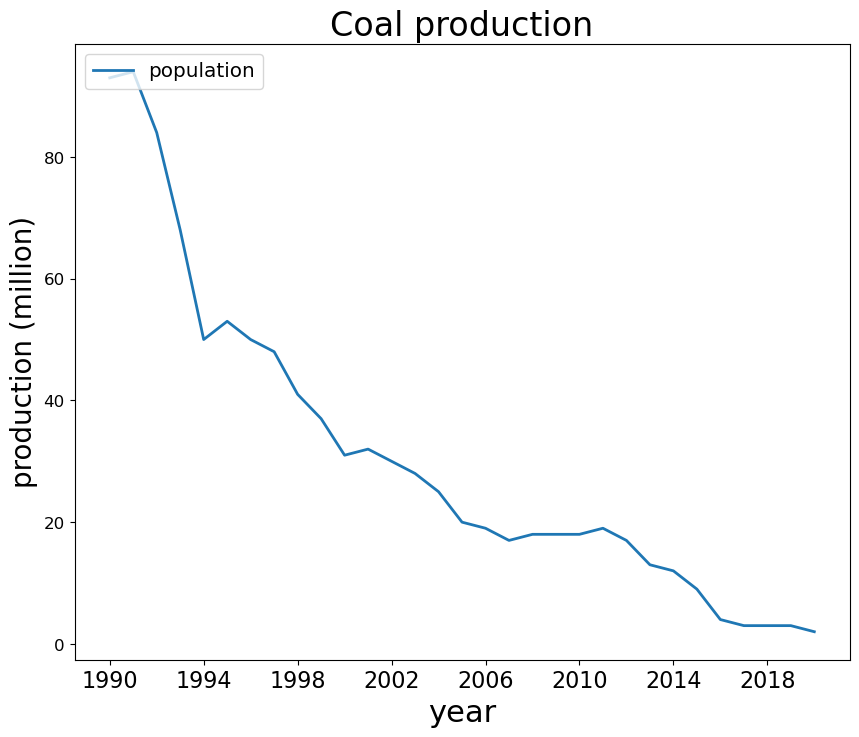

In [20]:
plt.figure(figsize=(10,8));
plt.plot(df_coal.year, df_coal.output, linewidth=2);
plt.xticks(np.arange(1990,2020,4),fontsize=16);
plt.yticks(fontsize=12);
plt.xlabel('year',fontsize=22)
plt.ylabel('production (million)', fontsize=20)
plt.title('Coal production', fontsize=24)
plt.legend(('population','urban population'), loc='upper left', fontsize='x-large');

#Data Preprocessing

The main focus of this experiment will be on total acid rain emissions per year. Preprocessing is done by constructing a new dataframe with the date and total acid emission values.

In [21]:
dfy= df[['Total']].copy()
conv_arr= dfy.values
arr = conv_arr.ravel()

In [22]:
dates_df = pd.read_csv('dates.csv', parse_dates=True)
df6= dates_df.join(dfy)

In [23]:
df6.index = pd.to_datetime(df6['date'])
df6.drop(columns='date',inplace=True)

#Stationarity test (ADF)

Staionarity test a mandatory pre-requisite for training a ARIMA (Auto Regressive moving average model). The time series under evaluations needs to be stationary for carrying forward further analysis.

*We would implement the AUgument Dickey fuller's test (ADF), which is a form of Unit root test, used to check for the stationarity of the dataset. The test considers a Hypothesis, where the null hypothesis defines the series to be non- stationary and the Allternative hypothesis defines the series to be stationary. Provided the p-value obtained from the result is < than 0.05 (min value), the null hypothesis is rejected and the series is declared as stationary. The test will be conducted on the pre-processed acid rain dataset*



*   **H0** : The time series is non-stationary
*   **H1**: The time series is stationary. 




In [24]:
#perform dickey fuller to see if differenced data is stationary
def adfuller_test(Total):
    result=adfuller(Total)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

adfuller_test(df6['Total'])

ADF Test Statistic : -3.769692102093018
p-value : 0.0032330794876723854
#Lags Used : 6
Number of Observations : 24


*The above results, gives a p- value of 0.003 which is less than 0.05 (critical value). Thus the null hypothesis can be rejected and the series is declared as Stationary. Let's check the plot of the series*

<Axes: xlabel='date'>

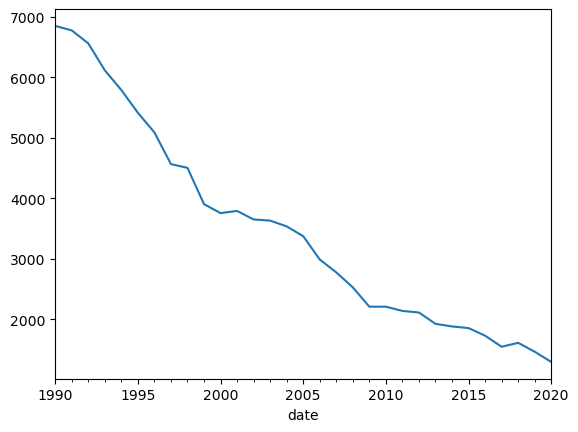

In [25]:
df6['Total'].plot()

*The plot shows a decreasing trend in the data, which visually dosen't make the data look stationary. For confirmation, that time series data can be divided into 2 halves to compute the mean and variance for both the halves. The below code demonstrates that. If the means and variance of both halves show significant difference that series can be concluded as non-stationary. Whereas, if there's no much difference in the mean and variance that series is stationary.*

In [26]:
series = df6['Total']
X = series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=4832.437500, mean2=2015.200000
variance1=1487020.371094, variance2=215595.093333


*The means and variance of both the halves show significant difference in the vlaues, which shows the series might be non-stationary. For safe side, first order differencing is done to make the data stationary in the code below.*

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [28]:
df6['First Difference'] = df6['Total'] - df6['Total'].shift(1)
df6.head(3)

,Total,First Difference
date,,
1990-01-31,6853,NaN
1991-01-31,6779,-74.0
1992-01-31,6564,-215.0


In [29]:
adfuller(df6['First Difference'].dropna())

(-1.5537065390976417,
 0.5067962111742028,
 6,
 23,
 {'1%': -3.7529275211638033,
  '5%': -2.998499866852963,
  '10%': -2.6389669754253307},
 249.62882802471026)

<Axes: xlabel='date'>

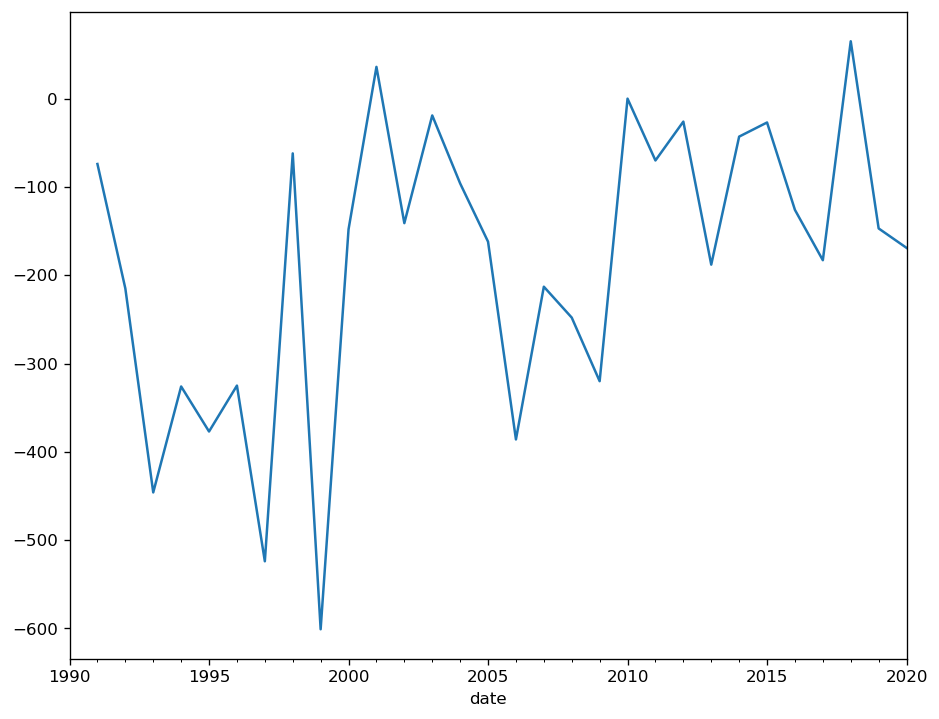

In [30]:
df6['First Difference'].plot()

*Since the differenced data shows unsatisfactory results, it wont be considered for further analysis.*

#ACF-PACF plots

*After converting the time series to a staionary time series dataset, the autocorrelatio and partial autocorrelation plots are computed to the order of the ARIMA model input. acf-pacf plot helps in discovering the AR, I and MA values.*

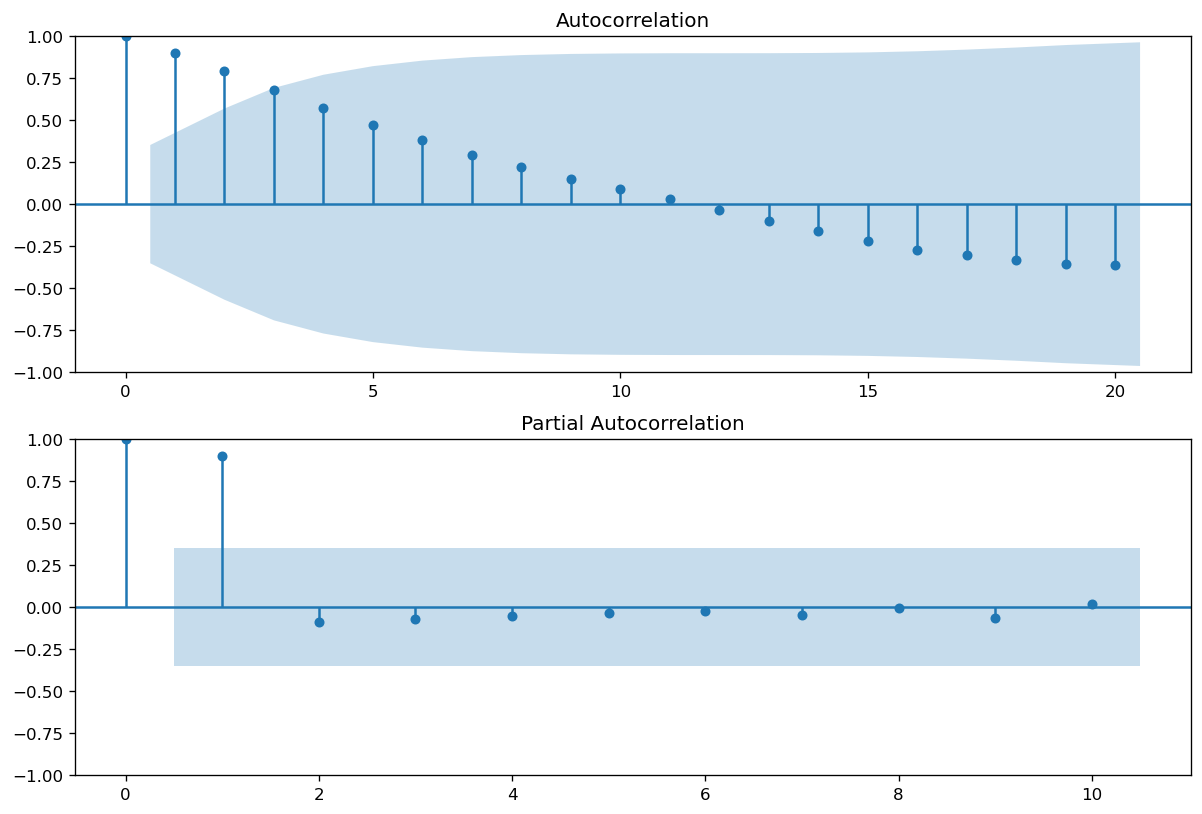

In [31]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df6['Total'].dropna(), lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df6['Total'].dropna(), lags=10, ax=ax2)  # Reduced nlags to 10
plt.show()


*As shown by the PACF plot, lag 1 appears to be the most significant among the others, therefore the p values can be tentatively set at 1. observing the ACF plot, the q value is set to 1, since lag 1 crosses the significant region. Thus, the input values obtained are (1,1,1) or (1,1,0)*

*As a last step of pre processing we check for the seasonality component in our acid rain dataset.We perform seasonal decomposition on the dataset and obtain the plot as shown below:  *

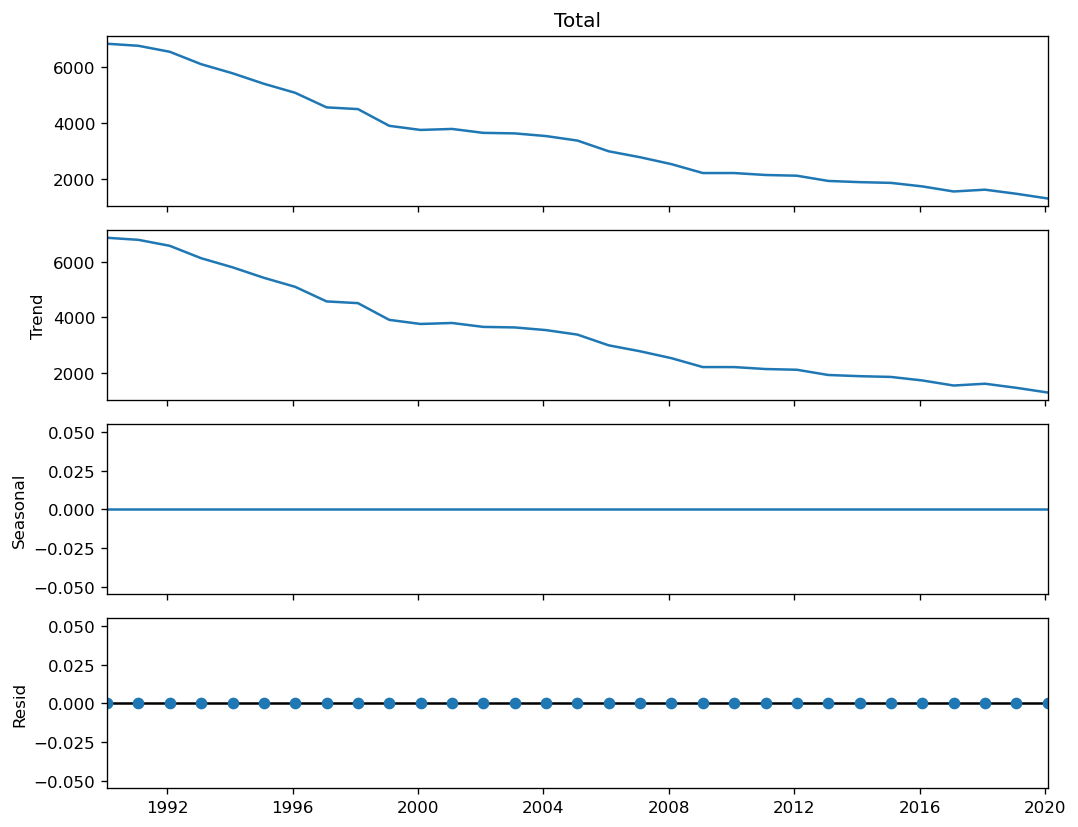

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df6['Total'], model="additive")
decompose_data.plot();

*The plot shows the seasonality component as a straight horizontal line, concluding that there is no seasonality present in the time series data under consideration.*

#Autoregressive Integrated Moving Average model (ARIMA)

*Using the input variables computed in the previous cells, the ARIMA is trained over the entire dataset to check the fit.*

In [33]:
from statsmodels.tsa.arima.model import ARIMA
# 1,1,0 ARIMA Model
model = ARIMA(df6['Total'], order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   31
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -200.837
Date:                Thu, 25 Apr 2024   AIC                            405.675
Time:                        10:29:30   BIC                            408.477
Sample:                    01-31-1990   HQIC                           406.571
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5832      0.131      4.466      0.000       0.327       0.839
sigma2      3.525e+04   7812.237      4.512      0.000    1.99e+04    5.06e+04
Ljung-Box (L1) (Q):                   6.09   Jarque-

*The model summary reveals a lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms. The model AIC value obtained is 395.816. The P Values of the AR1 is 0.327 which is greater then 0.05 (min value) significant value.*

*Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).*

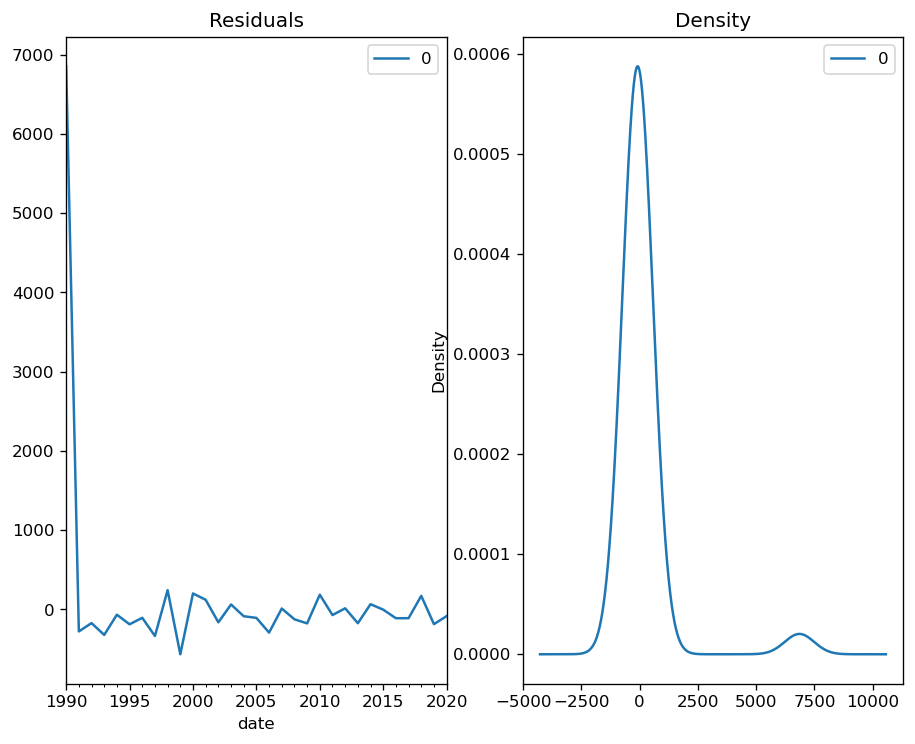

In [34]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

*The residual errors seem fine with near zero mean and uniform variance.*

Let's check the model fit, with increasing the differencing value to 2

In [35]:
from statsmodels.tsa.arima.model import ARIMA
# 1,1,0 ARIMA Model
model = ARIMA(df6['Total'], order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   31
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -200.837
Date:                Thu, 25 Apr 2024   AIC                            405.675
Time:                        10:29:31   BIC                            408.477
Sample:                    01-31-1990   HQIC                           406.571
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5832      0.131      4.466      0.000       0.327       0.839
sigma2      3.525e+04   7812.237      4.512      0.000    1.99e+04    5.06e+04
Ljung-Box (L1) (Q):                   6.09   Jarque-

The model produces better results with this input (1,2,0), with a reduced AIC value( 388) and the p value (0.001) < (0.05) being highly significant

Let’s plot the actuals against the fitted values using plot_predict().

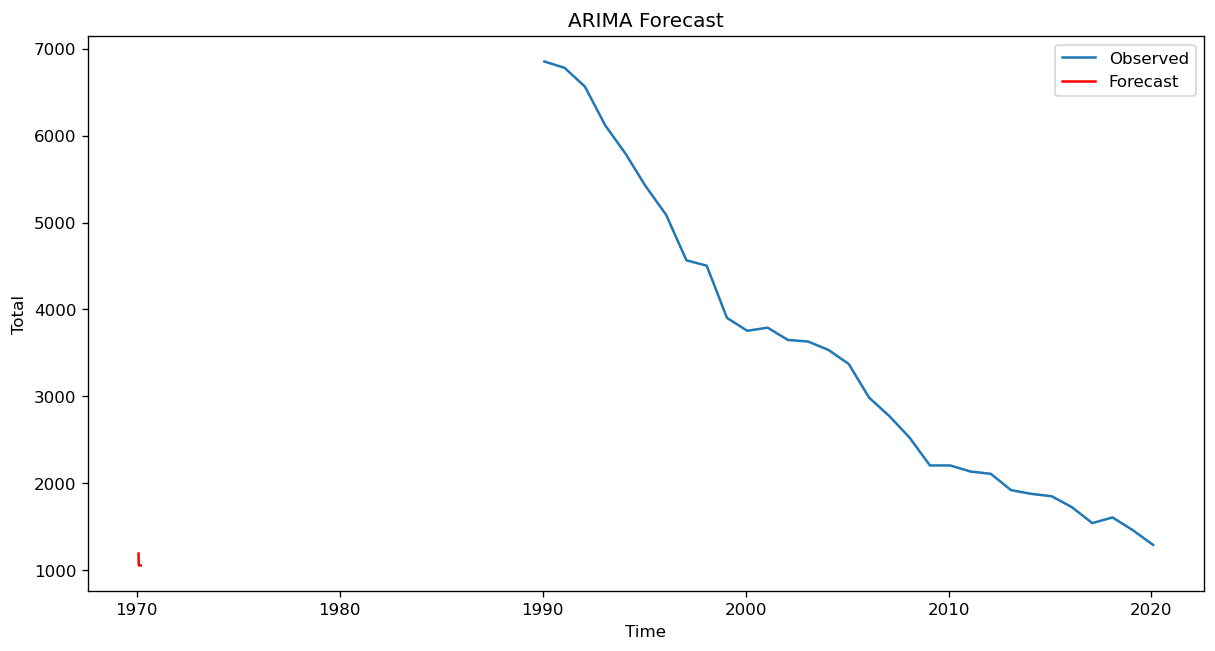

In [36]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define your ARIMA model
model = ARIMA(df6['Total'], order=(1,1,0))

# Fit the model
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(df6['Total']) + 10)  # Forecast for the length of data plus 10 steps

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df6['Total'], label='Observed')
plt.plot(range(len(df6['Total']), len(df6['Total']) + len(forecast)), forecast, color='red', label='Forecast')
plt.xlabel('Time')
plt.ylabel('Total')  # Update with your specific variable name
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


**Out of time Cross Validation**
*In Out-of-Time cross-validation, we take few steps back in time and forecast into the future to as many steps we took back. Then the forecast is compared agaisnt the actuals. To perform the cross validation the dataset is split into training and test series with a ratio of 80:20 respectively.*

In [37]:
# Create Training and Test
train = df6.Total[:25]
test = df6.Total[25:]

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   25
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -162.469
Date:                Thu, 25 Apr 2024   AIC                            328.937
Time:                        10:32:25   BIC                            331.293
Sample:                    01-31-1990   HQIC                           329.562
                         - 01-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5786      0.146      3.962      0.000       0.292       0.865
sigma2      3.994e+04   1.03e+04      3.895      0.000    1.98e+04       6e+04
Ljung-Box (L1) (Q):                   5.34   Jarque-

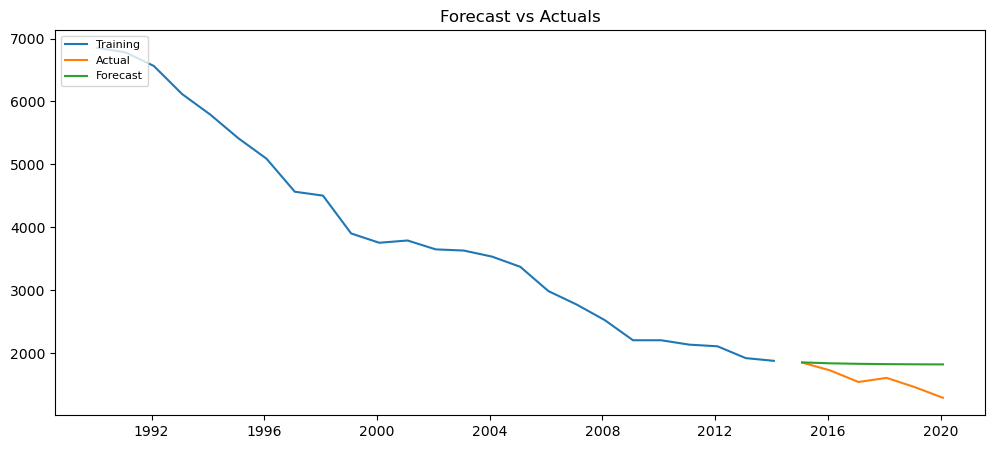

In [56]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Assuming train and test datasets are defined

# Build Model
model = ARIMA(train, order=(1, 1, 0))  
fitted_model = model.fit()  
print(fitted_model.summary())

# Forecast
fc = fitted_model.forecast(steps=6)  # Forecast next 6 steps

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


*From the chart, the ARIMA(1,1,0) model seems to give a directionally downward forecast and the actual observed values lie within the 95% confidence band. But each of the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve. To accomplish this the differencing order d is changed to 2.*

*As a result, The AIC has reduced to 311 from 320, which is a good sign. The P-values of the X terms are less the < 0.05, which is great.*

*The commonly used accuracy metrics to judge forecasts are given below:*

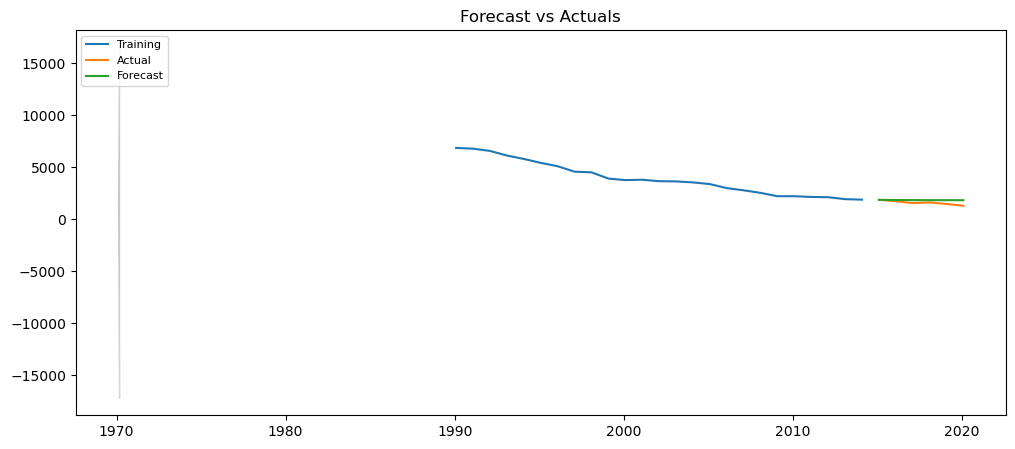

In [57]:
# Ensure the forecasted values have the same length as the test set
fc = fitted_model.forecast(len(test), alpha=0.05)  # Forecast for the length of the test set

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


*As we can see, if we look at RMSE and MAE, the prediction is very accurate, since RMSE is only 67 compared to acid emission around 2345 metric ton.*

#Auto ARIMA

*Auto ARIMA is an extention of ARIMA model. It uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.*

In [40]:
dfy_train = df6.Total[:round(len(dfy)*0.8)]
dfy_test = df6.Total[round(len(dfy)*0.8):]

In [41]:
!pip install pmdarima
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model2 = pm.auto_arima(dfy_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model2.summary())


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=314.459, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=318.622, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=312.829, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=316.623, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=314.313, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=316.263, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=310.831, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=312.313, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=312.460, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=311.277, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=314.263, Time=0.03 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.483 seconds
                               SARIMAX Results                                
Dep. Variable:           

*Best forecasting model obtained is ARIMA(1,2,0)(0,0,0)[0] .The AIC value obtained by this is model is 310, which is better compared to one obtained by ARIMA i.e 311. Now let's forecast the quality metrics*

In [42]:
m_auto_foca = model2.predict(6)
print('RMSE:', np.sqrt(mean_squared_error(dfy_test, m_auto_foca)))
print('MAE:', mean_absolute_error(dfy_test, m_auto_foca))

RMSE: 68.86516023181106
MAE: 60.91713683017948


*The rmse value obtained is 68 in this case, which is still fine when comared to the acid rain emission dataset range.*

**Residual plots**: Let’s review the residual plots using stepwise_fit. 

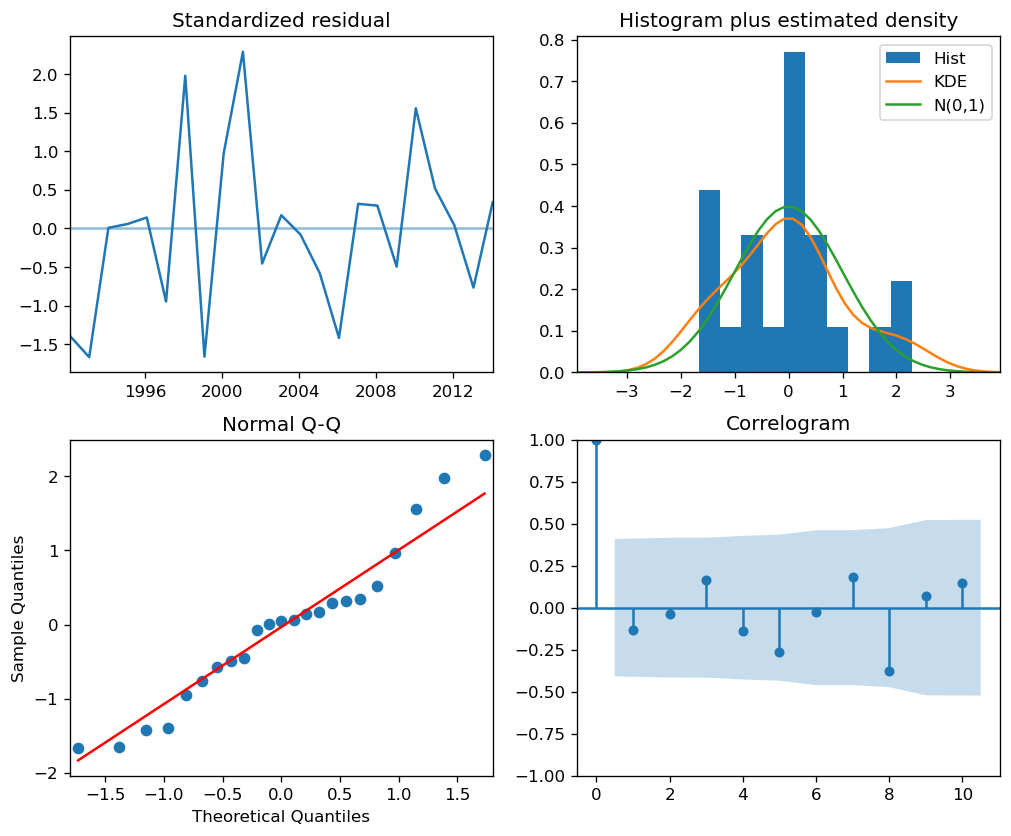

In [43]:
model2.plot_diagnostics(figsize=(10,8))
plt.show()

Interpretation of the following residual plots is given as follows: 

*   **Top left:** The residual errors seem to fluctuate around a mean of zero and have a non uniform variance.

* **Top Right:** The density plot suggest a right skewed distribution.

* **Bottom left:** All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed. As per the observation, the distribution is skewed.

* **Bottom Right**: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, the model seems a good fit to forecast.
  



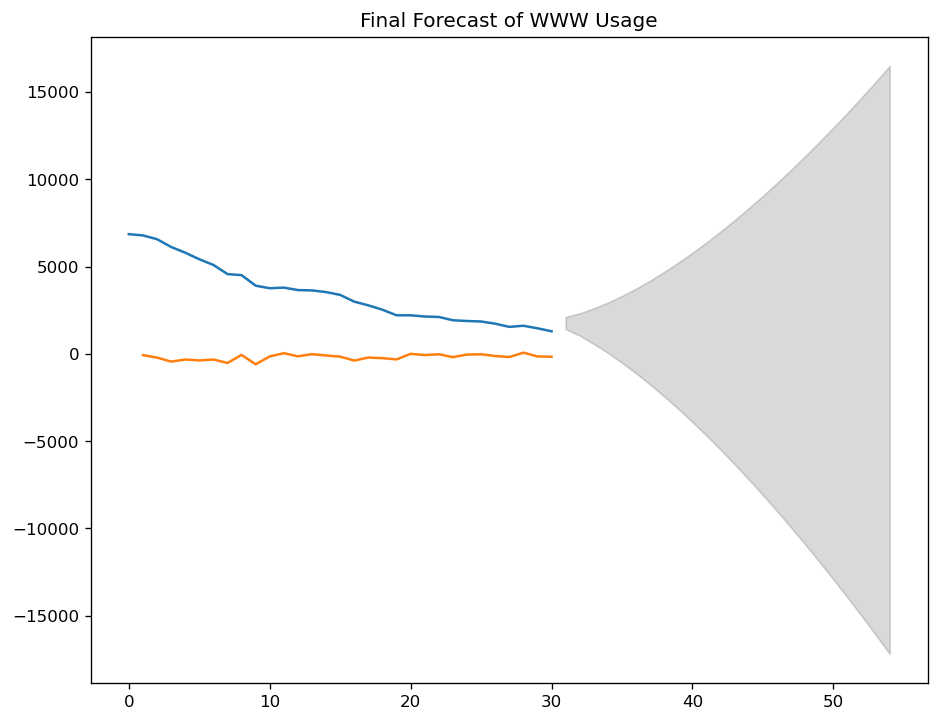

In [44]:
# Forecast
n_periods = 24
fc, confint = model2.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df6.values), len(df6.values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df6.values)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()


#Multi-variate time series analysis

**Cointegration test**:  
*Cointegration is a technique used to find a possible correlation between Multiple times series variables. It helps, establish the presence of a statistically significant connection between two or more time series.  This is the basic premise on which Vector Autoregression(VAR) models is based on. So, it’s fairly common to implement the cointegration test before starting to build VAR models. Two series are said to be correlated if there exists a linear combination of them that has an order of integration (d) less than that of the individual series.*

The Hypothesis test is defined as follows:                                
**Ho**: there is no correlation(or cointegration) between acid rain and SO2

**Ha**: there is correlation between acid rain and SO2 

In [45]:
def cointest(y1, y2):
    results = ts.coint(y1, y2)
    print('t-statistic:', results[0])
    print('pvalue:', results[1])
    print('crit_value for 1%, 5% and 10%:', results[2])
cointest(dfy, df2)

t-statistic: -2.4921679562557126
pvalue: 0.48800695363863894
crit_value for 1%, 5% and 10%: [-4.81004656 -4.03712141 -3.66345444]


*Since the test statistic value is greater than all the critical values, the null hypothesis is reject and the correlation exists*

**Johansen's Cointegration test**

*Johansen’s test is a way to determine if three or more time series are cointegrated. More specifically, it assesses the validity of a cointegrating relationship, using a maximum likelihood estimates (MLE) approach. It is also used to find the number of relationships and as a tool to estimating those relationships.*

In [46]:
df_tc = pd.DataFrame(index=dfy.index)
df_tc['acid_rain'], df_tc['so2'] = dfy['Total'], df2['Totalso2']

In [47]:
coint_johansen(df_tc,0,1).lr1

array([26.19479368,  5.37974537])

In [48]:
coint_johansen(df_tc,0,1).cvt

array([[13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

In [49]:
df_tp = pd.DataFrame(index=dfy.index)
df_tp['acid_rain'], df_tp['coal_production'] = dfy['Total'], df_coal.output.values

In [50]:
coint_johansen(df_tp,0,1).lr1

array([31.63367501,  8.6364618 ])

In [51]:
coint_johansen(df_tp,0,1).cvt

array([[13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

  **Granger Causality**:  
                                                *The basis behind Vector AutoRegression is that each of the time series in the system influences each other. That is, you can predict the series with past values of itself along with other series in the system.Using Granger’s Causality Test, it’s possible to test this relationship before even building the model. Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero. In simpler terms, the past values of time series (X) do not cause the other series (Y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis. Below is the code implementation*

In [52]:
maxlag=9
# define the Granger Causality test function
def grangers_causation_matrix(data, variables, test3='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df3 = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df3.columns:
        for r in df3.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test3][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df3.loc[r, c] = min_p_value
    df3.columns = [var + '_x' for var in variables]
    df3.index = [var + '_y' for var in variables]
    return df3
 

In [53]:
grangers_causation_matrix(data = df_tc, variables = df_tc.columns)

,acid_rain_x,so2_x
acid_rain_y,1.0,0.0184
so2_y,0.0,1.0000


*The row are the Response (Y) and the columns are the predictor series (X). Since 0.0184 is less than the citical value 0.05, SO2 causes acid_rain. But acid rain does not cause so2 emission.*

*Similarly, the test is applied onto all the three time series under consideratrion.*

In [54]:
df_tcr = pd.DataFrame(index=dfy.index)
df_tcr['acid_rain'], df_tcr['so2'], df_tcr['coal_production'] = dfy['Total'], df2['Totalso2'], df_coal['output']

In [55]:
grangers_causation_matrix(data = df_tcr, variables = df_tcr.columns)

,acid_rain_x,so2_x,coal_production_x
acid_rain_y,1.0,0.0184,0.0000
so2_y,0.0,1.0000,0.0011
coal_production_y,0.0,0.0000,1.0000


*Since the p value of coal production (0.0011) is less than 0.05, coal production causes acid rain. But there is no causal relationship between coal production and acid rain. To conclude from the above granger causality test => (so2 emission causes acid_rain) and (coal production causes so2 emission)* 

*Based on the above results, the Vector Autoregression model is used to forecast the influence of one time series over the other.*

*The present work focuses on the time series analysis of acid rain occurance in India based on ARIMA . The univariate analysis has been carried out on acid rain emission values using ARIMA model and multivariate analysis has been performed on Acid rain emission, annual coal production and SO2 emission using VAR model. The performance of both the models has been depicted based on a number of metrics namely RMSE and MAE. As differenced data is used as an input to the prediction models, VAR model produces better forecasts than ARIMA model. From the results, it has been observed that for the prediction of acid rain, ARIMA produces RMSE of 68   compared to 21.823 for the VAR model respectively. Thus, the results produced by ARIMA model for acid rain prediction produces more error in comparison to the error produced by VAR model. Further, it has been found that the high error exists between the actual and predicted values of acid rain and SO2 when compared to SO2 and coal production data computed by the VAR model. Coal production shows strong correlations with Sulphur dioxide production, which can attributed to it’s chemical composition. Whereas, the correlation of SO2 with acid rain is not as strong as that with coal, which shows that Sulphur is not solely responsible for causing acid rain*.



